### Importieren wichtiger Bibliotheken

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Die Filmdaten Zeigen

In [86]:
# CSV-Datei in pandas DataFrame laden
df = pd.read_csv('data/movies_2015_2023.csv')
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Uri: The Surgical Strike,2019.0,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420.0,49.212
1,Attack,2022.0,Indisch,"With the Parliament under siege, India’s first...",6.735,204.0,58.312
2,Jawan,2023.0,Indisch,"An emotional journey of a prison warden, drive...",7.200,241.0,61.035
3,Tumbbad,2018.0,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241.0,74.908
4,Animal,2023.0,Indisch,The hardened son of a powerful industrialist r...,6.466,104.0,57.331
...,...,...,...,...,...,...,...
11999,Torve Fantasie,2019.0,Italienisch,NaN,0.000,0.0,1.175
12000,When Nuvolari Runs: The Flying Mantuan,2018.0,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6.0,1.063
12001,Baldus,2022.0,Italienisch,NaN,0.000,0.0,0.502
12002,Pastime,2019.0,Italienisch,A retired teacher is sitting at a table outsid...,0.000,0.0,0.635


### Die Zeilen mit NaN-Werten in der Spalte 'overview' Entfernen

In [87]:
df = df.dropna(subset=['overview'])

# Überprüfe, ob noch NaN-Werte vorhanden sind
print(df.isna().sum())


title           0
release_year    0
language        0
overview        0
vote_average    8
vote_count      8
popularity      8
dtype: int64


In [88]:
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Uri: The Surgical Strike,2019.0,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420.0,49.212
1,Attack,2022.0,Indisch,"With the Parliament under siege, India’s first...",6.735,204.0,58.312
2,Jawan,2023.0,Indisch,"An emotional journey of a prison warden, drive...",7.200,241.0,61.035
3,Tumbbad,2018.0,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241.0,74.908
4,Animal,2023.0,Indisch,The hardened son of a powerful industrialist r...,6.466,104.0,57.331
...,...,...,...,...,...,...,...
11995,Odissea nell'ospizio,2019.0,Italienisch,Four sixty-something disgraced comedians - who...,5.500,1.0,0.505
11996,Walls,2023.0,Italienisch,"For her debut film, model-actor turned filmmak...",6.100,4.0,1.052
11997,L'ultima bottega,2023.0,Italienisch,An almost eighty -year -old man works in his w...,0.000,0.0,0.503
12000,When Nuvolari Runs: The Flying Mantuan,2018.0,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6.0,1.063


### Duplikate entfernen

In [89]:
# Entferne doppelte Zeilen, falls vorhanden
df = df.drop_duplicates()

# Überprüfe, ob noch Duplikate vorhanden sind
print(f"Anzahl der Duplikate: {df.duplicated().sum()}")


Anzahl der Duplikate: 0


### Überprüfung und Bereinigung der Spalte 'language'

In [90]:
# Zeilen mit ungewöhnlichen Werten in der 'language'-Spalte anzeigen
unusual_languages = df[~df['language'].isin(['Amerikanisch', 'Indisch', 'Französisch', 'Spanisch', 'Deutsch', 'Italienisch'])]
print(f"Ungewöhnliche Einträge in 'language':\n{unusual_languages}")

Ungewöhnliche Einträge in 'language':
                                                  title  release_year  \
1263   Chaos ensues on a Friday as one outrageously ...           6.5   
2694   Of the domestic exploration for finding my vo...           6.9   
4596   This documentary seeks to dispel some of the ...           6.0   
5200   A grotesque on beastly humans and human beast...           0.0   

     language overview  vote_average  vote_count  popularity  
1263        2    1.103           NaN         NaN         NaN  
2694        8   32.765           NaN         NaN         NaN  
4596        1    3.555           NaN         NaN         NaN  
5200        0    1.333           NaN         NaN         NaN  


In [91]:
# Entfernen der Zeilen mit ungewöhnlichen Sprachwerten
df = df[df['language'].isin(['Amerikanisch', 'Indisch', 'Französisch', 'Spanisch', 'Deutsch', 'Italienisch'])]

In [92]:
# Aktualisierte Häufigkeitszählung
language_counts = df['language'].value_counts()
print(f"Anzahl der Filme pro Sprache nach Bereinigung:\n{language_counts}")

Anzahl der Filme pro Sprache nach Bereinigung:
language
Amerikanisch    1999
Indisch         1921
Französisch     1811
Spanisch        1800
Deutsch         1583
Italienisch     1465
Name: count, dtype: int64


### Die gültigkeit der Werte überprüfen

In [93]:
# Überprüfe, ob es ungültige Werte außerhalb des Bereichs 0-10 gibt
invalid_votes = df[(df['vote_average'] < 0) | (df['vote_average'] > 10)]

# Zeige die ungültigen Werte an
print(f"Ungültige Bewertungen:\n{invalid_votes}")


Ungültige Bewertungen:
Empty DataFrame
Columns: [title, release_year, language, overview, vote_average, vote_count, popularity]
Index: []


In [94]:
# Statistische Beschreibung der 'popularity'-Spalte
print(df['popularity'].describe())

# Überprüfe, ob es negative Werte oder Ausreißer gibt
invalid_popularity = df[df['popularity'] < 0]
print(f"Es gibt {len(invalid_popularity)} ungültige Werte in 'popularity'.")


count    10575.000000
mean        10.463949
std         19.420977
min          0.067000
25%          1.926000
50%          4.216000
75%         10.417000
max        339.140000
Name: popularity, dtype: float64
Es gibt 0 ungültige Werte in 'popularity'.


In [95]:
# Pfad zur Datei
file_path = 'data/movies_2015_2023_cleaned.csv'

# Speichere die bereinigten Daten in einer neuen CSV-Datei, überschreibe wenn sie existiert
df.to_csv(file_path, index=False)

if os.path.exists(file_path):
    print(f"Die Datei '{file_path}' wurde erfolgreich überschrieben und gespeichert.")
else:
    print(f"Die Datei '{file_path}' wurde erfolgreich gespeichert.")


Die Datei 'data/movies_2015_2023_cleaned.csv' wurde erfolgreich überschrieben und gespeichert.


In [96]:
# CSV-Datei in pandas DataFrame laden
df = pd.read_csv('data/movies_2015_2023_cleaned.csv')
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Uri: The Surgical Strike,2019.0,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420.0,49.212
1,Attack,2022.0,Indisch,"With the Parliament under siege, India’s first...",6.735,204.0,58.312
2,Jawan,2023.0,Indisch,"An emotional journey of a prison warden, drive...",7.200,241.0,61.035
3,Tumbbad,2018.0,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241.0,74.908
4,Animal,2023.0,Indisch,The hardened son of a powerful industrialist r...,6.466,104.0,57.331
...,...,...,...,...,...,...,...
10574,Odissea nell'ospizio,2019.0,Italienisch,Four sixty-something disgraced comedians - who...,5.500,1.0,0.505
10575,Walls,2023.0,Italienisch,"For her debut film, model-actor turned filmmak...",6.100,4.0,1.052
10576,L'ultima bottega,2023.0,Italienisch,An almost eighty -year -old man works in his w...,0.000,0.0,0.503
10577,When Nuvolari Runs: The Flying Mantuan,2018.0,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6.0,1.063


### Die Anzahl der Filme pro Sprache

language
Amerikanisch    1999
Indisch         1921
Französisch     1811
Spanisch        1800
Deutsch         1583
Italienisch     1465
Name: count, dtype: int64


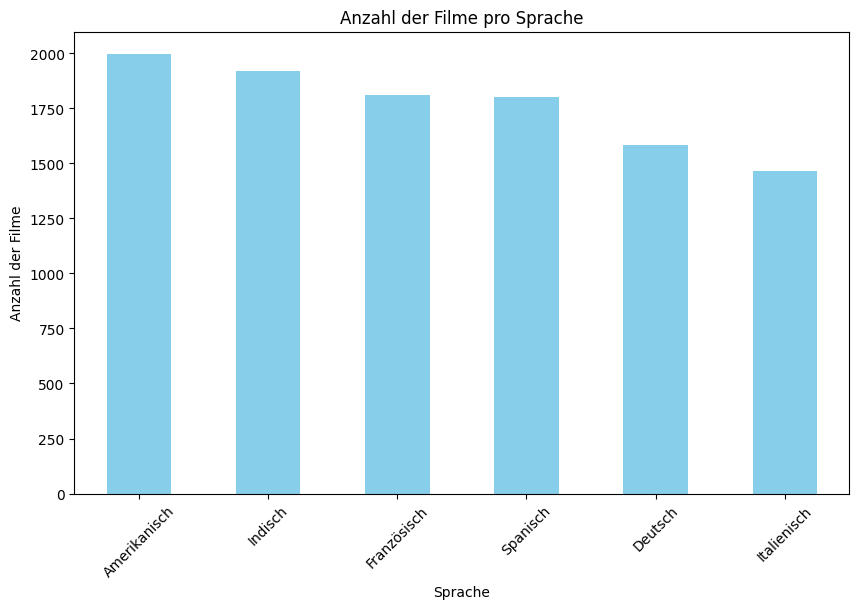

In [97]:
language_counts = df['language'].value_counts()
# Ausgabe der Anzahl der Filme pro Sprache
print(language_counts)

# Visualisiere die Anzahl der Filme pro Sprache als Balkendiagramm
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Anzahl der Filme pro Sprache')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.show()

### Downsampling der Mehrheit

language
Amerikanisch    1465
Deutsch         1465
Französisch     1465
Indisch         1465
Italienisch     1465
Spanisch        1465
Name: count, dtype: int64


/tmp/ipykernel_7906/3585966652.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_down = df.groupby('language').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


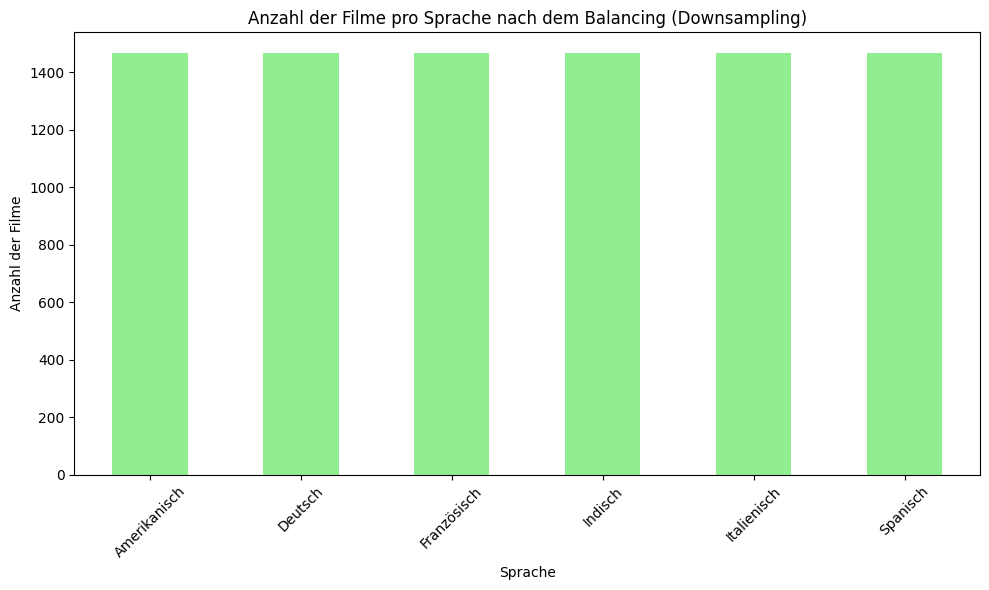

In [98]:
# Finde die minimale Anzahl von Filmen pro Sprache
min_count = df['language'].value_counts().min()

# Für jede Sprache eine zufällige Auswahl an Filmen, basierend auf der minimalen Anzahl
df_balanced_down = df.groupby('language').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# Überprüfe die Anzahl der Filme pro Sprache nach dem Balancing
print(df_balanced_down['language'].value_counts())

# Visualisiere die Anzahl der Filme pro Sprache nach dem Balancing als Balkendiagramm
plt.figure(figsize=(10, 6))
df_balanced_down['language'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Anzahl der Filme pro Sprache nach dem Balancing (Downsampling)')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.tight_layout()  # sorgt für bessere Darstellung
plt.show()


In [99]:
# Speichere die balancierten Daten (Downsampling) in einer neuen CSV-Datei
df_balanced_down.to_csv('data/movies_2015_2023_balanced_down.csv', index=False)

print("Die Downsampling-Daten wurden erfolgreich gespeichert.")

Die Downsampling-Daten wurden erfolgreich gespeichert.


### Oversampling der Minderheit

language
Amerikanisch    1999
Deutsch         1999
Französisch     1999
Indisch         1999
Italienisch     1999
Spanisch        1999
Name: count, dtype: int64


/tmp/ipykernel_7906/3175944802.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_over = df.groupby('language').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)


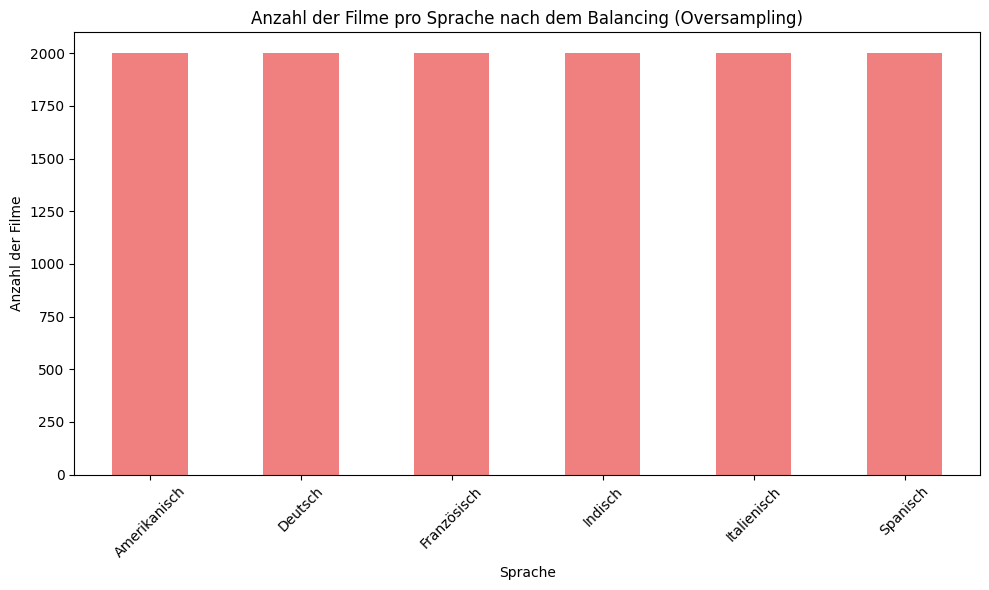

In [100]:
# Finde die maximale Anzahl von Filmen pro Sprache
max_count = df['language'].value_counts().max()

# Für jede Sprache Filme duplizieren, bis sie die maximale Anzahl erreicht
df_balanced_over = df.groupby('language').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)

# Überprüfe die Anzahl der Filme pro Sprache nach dem Balancing
print(df_balanced_over['language'].value_counts())

# Visualisiere die Anzahl der Filme pro Sprache nach dem Balancing (Oversampling) als Balkendiagramm
plt.figure(figsize=(10, 6))
df_balanced_over['language'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Anzahl der Filme pro Sprache nach dem Balancing (Oversampling)')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.tight_layout()  # sorgt für bessere Darstellung des Plots
plt.show()


In [101]:
# Speichere die balancierten Daten (Oversampling) in einer neuen CSV-Datei
df_balanced_over.to_csv('data/movies_2015_2023_balanced_over.csv', index=False)

print("Die Oversampling-Daten wurden erfolgreich gespeichert.")


Die Oversampling-Daten wurden erfolgreich gespeichert.
